# MULTIVARIATE LINEAR REGRESSION

- Simple linear regression multiple variable

$$\hat{y}= m_0 x_0 + m_1 x_1 + m_3 x_3 + ... + c$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [9]:
data = {
    'mesin x1' : [112,250,360,450,600],
    'usia x2' : [5,3,3,1,1],
    'km x3' : [8,7,7,5,4],
    'harga y' : [100,200,300,400,500]
}
df = pd.DataFrame(data)
df

,mesin x1,usia x2,km x3,harga y
0,112,5,8,100
1,250,3,7,200
2,360,3,7,300
3,450,1,5,400
4,600,1,4,500


# Korelasi :)

In [6]:
df.corr()

,mesin x1,usia x2,km x3,harga y
mesin x1,1.000000,-0.934973,-0.954740,0.996942
usia x2,-0.934973,1.000000,0.945611,-0.944911
km x3,-0.954740,0.945611,1.000000,-0.962250
harga y,0.996942,-0.944911,-0.962250,1.000000


# Linear Regression

In [10]:
model = LinearRegression()
model.fit (df[['mesin x1','usia x2','km x3']],df['harga y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Hitung Gradient dan Intercept

In [24]:
m=(model.coef_)
c=(model.intercept_)
print(m)
print(round (c))

[ 0.72827725 -6.57960824 -7.33299849]
104.0


 # Plot

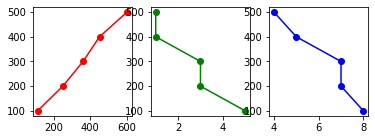

In [13]:
plt.figure (figsize=(6,2))
plt.subplot(131)
plt.plot(df['mesin x1'], df ['harga y'], 'r-o')
plt.subplot(132)
plt.plot(df['usia x2'], df ['harga y'], 'g-o')
plt.subplot(133)
plt.plot(df['km x3'], df ['harga y'], 'b-o')



### ANALISIS : Berdasarkan plot diatas terdapat 2 var X yang korelasi negatif dan kuat ( usia dan km ) sedangkan pada variabel mesin memiliki korelasi yang positif dan kuat

# Prediksi Harga Terbaik untuk semua data / Var X

In [14]:
# mesin , usia, km
# data 1
model.predict ([[112,5,8]])[0]

94.47513812154699

In [15]:
# semua data

df['y_pred'] = model.predict (df[['mesin x1','usia x2','km x3']])
df

,mesin x1,usia x2,km x3,harga y,y_pred
0,112,5,8,100,94.475138
1,250,3,7,200,215.469613
2,360,3,7,300,295.580110
3,450,1,5,400,388.950276
4,600,1,4,500,505.524862


# Prediksi berdasarkan mesin x1, usia x2 , km x3


In [30]:
df ['y" x1'] = m[0] * df['mesin x1'] + c
df ['y" x2'] = m[1] * df['usia x2'] + c
df ['y" x3'] = m[2] * df['km x3'] + c
df

,mesin x1,usia x2,km x3,harga y,y_pred,"y"" x1","y"" x2","y"" x3"
0,112,5,8,100,94.475138,186.037167,71.572074,45.806128
1,250,3,7,200,215.469613,286.539427,84.731291,53.139126
2,360,3,7,300,295.580110,366.649925,84.731291,53.139126
3,450,1,5,400,388.950276,432.194877,97.890507,67.805123
4,600,1,4,500,505.524862,541.436464,97.890507,75.138122


# PLOT dengan Y_Pred

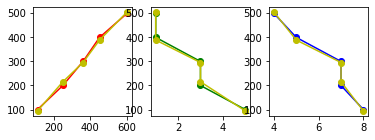

In [19]:
plt.figure (figsize=(6,2))
plt.subplot(131)
plt.plot(df['mesin x1'], df ['harga y'], 'r-o')
plt.plot(df['mesin x1'], df ['y_pred'], 'y-o')
plt.subplot(132)
plt.plot(df['usia x2'], df ['harga y'], 'g-o')
plt.plot(df['usia x2'], df ['y_pred'], 'y-o')
plt.subplot(133)
plt.plot(df['km x3'], df ['harga y'], 'b-o')
plt.plot(df['km x3'], df ['y_pred'], 'y-o')


# Plot dengan y"

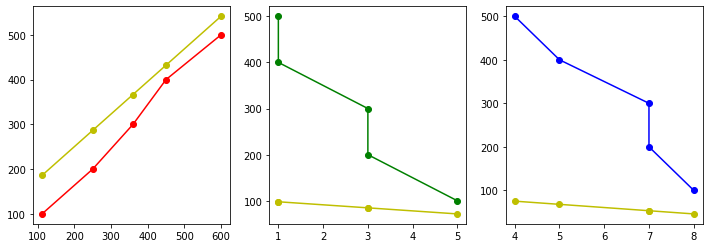

In [34]:
plt.figure (figsize=(12,4))
plt.subplot(131)
plt.plot(df['mesin x1'], df ['harga y'], 'r-o')
plt.plot(df['mesin x1'], df ['y" x1'], 'y-o')
plt.subplot(132)
plt.plot(df['usia x2'], df ['harga y'], 'g-o')
plt.plot(df['usia x2'], df ['y" x2'], 'y-o')
plt.subplot(133)
plt.plot(df['km x3'], df ['harga y'], 'b-o')
plt.plot(df['km x3'], df ['y" x3'], 'y-o')


# Evaluation Metrics

## MAE , MSE , RMSE , MedAE , MSLE , RMSLE , R2 SCORE

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,median_absolute_error,mean_squared_log_error,r2_score
print ("MAE : ",
round (mean_absolute_error (df['harga y'],df['y_pred']),2))

print ("MSE : ",
round (mean_squared_error (df['harga y'],df['y_pred']),2))

print ("RMSE : ",
np.sqrt(round (mean_squared_error (df['harga y'],df['y_pred']),2)))

print ("MedAE : ",
round (median_absolute_error (df['harga y'],df['y_pred']),2))

print ("MSLE : ",
round (mean_squared_log_error (df['harga y'],df['y_pred']),2))

print ("RMSLE : ",
np.sqrt(round (mean_squared_log_error (df['harga y'],df['y_pred']),2)))

print ("R2 SCORE : ",
round ( r2_score (df['harga y'],df['y_pred'])))

MAE :  8.4
MSE :  88.4
RMSE :  9.402127418834526
MedAE :  5.52
MSLE :  0.0
RMSLE :  0.0
R2 SCORE :  1.0
